# Pandas Input Demo

This notebook describes how to read data into Pandas from various sources

## standard imports

In [13]:
import pandas as pd
%matplotlib inline

## read_csv()
Read CSV files. The delimiters and escaped characters can be tweaked as needed. There is a huge number of options for this function.

In [14]:
df_csv = pd.read_csv('../DATA/airport_boardings.csv', thousands=',', index_col=1)
df_csv.head()

,Airport,2001 Rank,2001 Total,2010 Rank,2010 Total,2011 Rank,Total,Percent change 2001-2011,Percent change 2010-2011
Code,,,,,,,,,
ATL,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",1,36384264,1,42655392,1,33034788,-9.2,-22.6
ORD,"Chicago, IL (Chicago O'Hare International)",2,28626694,2,30033313,2,22367052,-21.9,-25.5
DFW,"Dallas, TX (Dallas/Fort Worth International)",3,25198256,3,26785739,3,20430281,-18.9,-23.7
DEN,"Denver, CO (Denver International)",6,16397390,4,24965553,4,19190341,17.0,-23.1
LAX,"Los Angeles, CA (Los Angeles International)",4,22873307,5,22860849,5,18379418,-19.6,-19.6


## read_table()
Read text files (other than CSV). This function is very similar to *read_csv()* and shares most of its options. This is the best choice for tab-delimited, space-delimited, and other delimited flat file formats. 

In [15]:
df_table = pd.read_table('../DATA/columns_of_numbers.txt', delim_whitespace=True)
# df_table.set_index = pd.date_range('1/1/2017', periods=len(df_table), freq='D')
df_table.head()

,Alpha,Beta,Gamma,Delta,Epsilon,Zeta
0,63,51,59,61,50,4
1,40,66,9,64,63,17
2,18,23,2,61,1,9
3,29,8,40,59,10,26
4,54,9,68,4,16,21


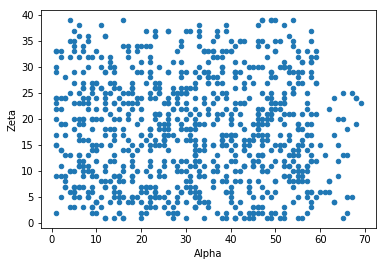

In [16]:
df_table.plot(kind='scatter', x='Alpha', y='Zeta')

## read_sql(), read_sql_query(), read_sql_table()
Read data from a SQL database. It requires a connection object from one of the Python modules that follows the DB API, or it can use a SQLAlchemy DB engine object. A dataframe is created from the rows in the result set. 

TODO: describe read_sql_table  read_sql_query

### read_sql()
read_sql() is a convenience function that delegates to either *read_sql_query()* or *read_sql_table()*, as appropriate. 
It takes a query (or a table name) and the database connection. If a table is specified, the connection must be a SQLAlchemy engine. If a query is specified, it can be either a SQLAlchemy engine or a DB API connection object, as from pymssql, pyodbc, pymysql, cx_oracle, psycopg, etc. 

In [17]:
import sqlite3
conn = sqlite3.connect('../DATA/presidents.db')
df_sql = pd.read_sql('select * from presidents', conn)
df_sql.head()

,termnum,lastname,firstname,termstart,termend,birthplace,birthstate,birthdate,deathdate,party
0,1,Washington,George,1789-04-30,1797-03-04,Westmoreland County,Virginia,1732-02-22,1799-12-14,no party
1,2,Adams,John,1797-03-04,1801-03-04,"Braintree, Norfolk",Massachusetts,1735-10-30,1826-07-04,Federalist
2,3,Jefferson,Thomas,1801-03-04,1809-03-04,Albermarle County,Virginia,1743-04-13,1826-07-04,Democratic - Republican
3,4,Madison,James,1809-03-04,1817-03-04,Port Conway,Virginia,1751-03-16,1836-06-28,Democratic - Republican
4,5,Monroe,James,1817-03-04,1825-03-04,Westmoreland County,Virginia,1758-04-28,1831-07-04,Democratic - Republican


### read_sql_query()
read_sql_query() populates a dataframe from a SQL query. Either a DB API connection or a SQLAlchemy engine may be specified. 

In [18]:
df_sql = pd.read_sql_query('select * from presidents', conn)
df_sql.head()

,termnum,lastname,firstname,termstart,termend,birthplace,birthstate,birthdate,deathdate,party
0,1,Washington,George,1789-04-30,1797-03-04,Westmoreland County,Virginia,1732-02-22,1799-12-14,no party
1,2,Adams,John,1797-03-04,1801-03-04,"Braintree, Norfolk",Massachusetts,1735-10-30,1826-07-04,Federalist
2,3,Jefferson,Thomas,1801-03-04,1809-03-04,Albermarle County,Virginia,1743-04-13,1826-07-04,Democratic - Republican
3,4,Madison,James,1809-03-04,1817-03-04,Port Conway,Virginia,1751-03-16,1836-06-28,Democratic - Republican
4,5,Monroe,James,1817-03-04,1825-03-04,Westmoreland County,Virginia,1758-04-28,1831-07-04,Democratic - Republican


### read_sql_table()
read_sql_table() populates a dataframe with an entire SQL table. The connection must be a SQLAlchemy engine. 

In [19]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../DATA/presidents.db')
df_sql = pd.read_sql_table('presidents', engine)
df_sql.head()

,termnum,lastname,firstname,termstart,termend,birthplace,birthstate,birthdate,deathdate,party
0,1,Washington,George,1789-04-30,1797-03-04,Westmoreland County,Virginia,1732-02-22,1799-12-14,no party
1,2,Adams,John,1797-03-04,1801-03-04,"Braintree, Norfolk",Massachusetts,1735-10-30,1826-07-04,Federalist
2,3,Jefferson,Thomas,1801-03-04,1809-03-04,Albermarle County,Virginia,1743-04-13,1826-07-04,Democratic - Republican
3,4,Madison,James,1809-03-04,1817-03-04,Port Conway,Virginia,1751-03-16,1836-06-28,Democratic - Republican
4,5,Monroe,James,1817-03-04,1825-03-04,Westmoreland County,Virginia,1758-04-28,1831-07-04,Democratic - Republican


## read_excel()
Read data from an Excel spreadsheet. The spreadsheet may be on the local computer, or specified via a URL. 

<!-- TODO: use different spreadsheet for local -->

### Local file

In [20]:
df_excel_local = pd.read_excel('../DATA/presidents.xlsx')
df_excel_local.head()

,Term,Last Name,First Name,Birth Date,Death Date,Place of Birth,State of Birth,Date took office,Date left Office,Party affiliation
0,1,Washington,George,1732-02-22,1799-12-14,Westmoreland County,Virginia,1789-04-30,1797-03-04,no party
1,2,Adams,John,1735-10-30,1826-07-04,"Braintree, Norfolk",Massachusetts,1797-03-04,1801-03-04,Federalist
2,3,Jefferson,Thomas,1743-04-13,1826-07-04,Albermarle County,Virginia,1801-03-04,1809-03-04,Democratic - Republican
3,4,Madison,James,1751-03-16,1836-06-28,Port Conway,Virginia,1809-03-04,1817-03-04,Democratic - Republican
4,5,Monroe,James,1758-04-28,1831-07-04,Westmoreland County,Virginia,1817-03-04,1825-03-04,Democratic - Republican


### URL

In [21]:
df_excel_url = pd.read_excel('http://qrc.depaul.edu/Excel_Files/Presidents.xls',
        na_values="NA()")
df_excel_url.head()

,President,Years in office,Year first inaugurated,Age at inauguration,State elected from,# of electoral votes,# of popular votes,National total votes,Total electoral votes,Rating points,Political Party,Occupation,College,% electoral,% popular
0,George Washington,8,1789,57,Virginia,69,NaN,NaN,69,842.0,None,Planter,None,100.000000,NaN
1,John Adams,4,1797,61,Massachusetts,132,NaN,NaN,139,598.0,Federalist,Lawyer,Harvard,94.964029,NaN
2,Thomas Jefferson,8,1801,57,Virginia,73,NaN,NaN,137,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,NaN
3,James Madison,8,1809,57,Virginia,122,NaN,NaN,176,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,NaN
4,James Monroe,8,1817,58,Virginia,183,NaN,NaN,221,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,NaN


## read_html()
Read data from one or more tables in a Web page. It returns a list of DataFrames, even if there is only one table in the page. 

3
           Gainers & Losers   Price  Change % Change
0  CXOConcho Resources I...  138.51    6.82   +5.18%
1  FCXFreeport-McMoRan I...   16.94    0.69   +4.25%
2      EOGEOG Resources Inc  124.60    4.92   +4.11%
3            APAApache Corp   45.91    1.74   +3.94%
4  PXDPioneer Natural Re...  193.51    7.23   +3.88%
************************************************************
           Stock Sectors 3 Month % Change
0         Communications           -1.42%
1      Consumer Durables           +3.26%
2  Consumer Non-Durables           -2.33%
3    Commercial Services           +1.58%
4  Electronic Technology           +5.19%
************************************************************
   GILD    Gilead Sciences Inc.  Unnamed: 2
0   LVS   Las Vegas Sands Corp.         NaN
1  CELG     Celgene Corporation         NaN
2  AAPL              Apple Inc.         NaN
3   TXN  Texas Instruments Inc.         NaN
4    UA      Under Armour, Inc.         NaN
******************************************

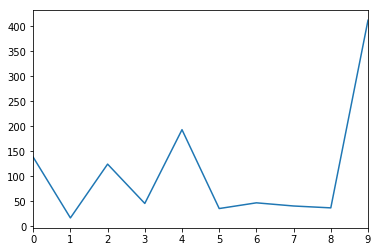

In [22]:
df_list = pd.read_html('http://money.cnn.com/data/us_markets/', header=0)
print(len(df_list))
for df in df_list:
    print(df.head())
    print('*' * 60)
    
gain_lose = df_list[0]
print(gain_lose.loc[:,['Gainers & Losers', 'Price']])
gain_lose['Price'].plot()

## read_fwf()
This function reads files with fixed-width fields. If the fields you want are contiguous, specify the widths of all columns with the *widths* parameter. If they are non-contiguous (you just want to pull out certain columns), specify the columns with the *colspecs* parameter, which takes a list of tuples describing the beginning and end end of each desired column. If neither *widths* or *colspecs* is given, *read_fwf()* tries to infer the columns. 

In [23]:
df_fwf = pd.read_fwf('../DATA/world_median_ages.txt', 
    names=['country', 'median_age'], widths=[7,50,4], index_col=0)
print(df_fwf.head())
print(df_fwf.iloc[1])

FileNotFoundError: [Errno 2] No such file or directory: '../DATA/world_median_ages.txt'

In [ ]:
ax = df_fwf.iloc[-20:].plot(kind='barh', x='country', y='median_age')
print(type(ax))
ax.set_ylabel('Median Age')
